In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import tkinter
from collections import Counter

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [9]:
# Load the dataset from sklearn dataset
from google.colab import drive
drive.mount('/content/drive')

columns_data = pd.read_csv('/content/sample_data/columns.csv')
responses_data = pd.read_csv('/content/sample_data/responses.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
columns_data.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [11]:
responses_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [15]:
print("**"*50)
responses_data.info()
print("**"*50)

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
****************************************************************************************************


In [14]:
print("**"*50)
print("Number of Rows: ", responses_data.shape[0])
print("Number of Colums: ", responses_data.shape[1])
print("**"*50)

****************************************************************************************************
Number of Rows:  1010
Number of Colums:  150
****************************************************************************************************


In [16]:
# before starting the analysis get summary of the data
responses_data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

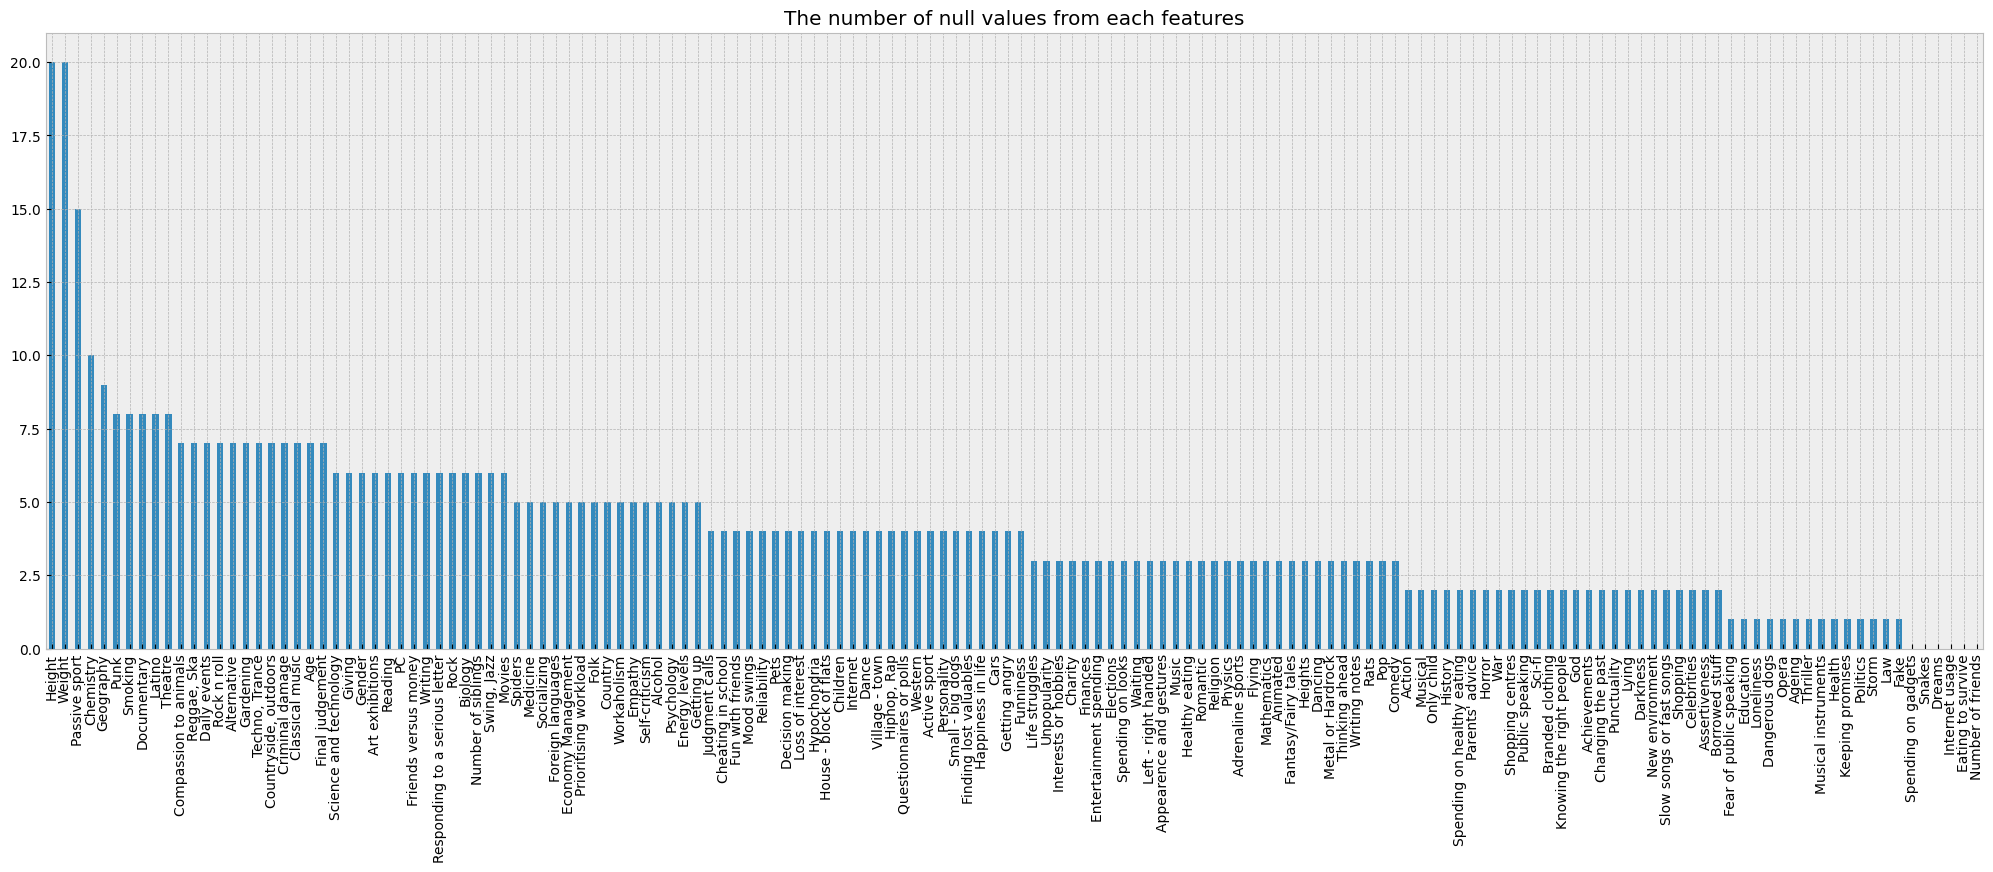

In [18]:
data_null = responses_data.isnull().sum().sort_values(ascending=False)
data_null.plot(kind='bar', figsize=(25, 8))
plt.title("The number of null values from each features")
plt.show()

In [23]:
pd.set_option('display.max_rows', 500)
cols = pd.DataFrame(responses_data.columns)
cols

,0
0,Music
1,Slow songs or fast songs
2,Dance
3,Folk
4,Country
5,Classical music
6,Musical
7,Pop
8,Rock
9,Metal or Hardrock



PHOBIAS

- Flying: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Thunder, lightning: Not afraid at all 1-2-3-4-5 Very afraid of (integer) - There is no this feature in the dataset itself
- Darkness: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Heights: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Spiders: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Snakes: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Rats, mice: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Ageing: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Dangerous dogs: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- Public speaking: Not afraid at all 1-2-3-4-5 Very afraid of (integer)

In [78]:
data = responses_data[['Flying', 'Storm','Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Public speaking']]
#There is a missing feature list in the sample of feature define in the kaggle itself - Thunder (it's change to storm)
data.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Public speaking
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,5.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,5.0


I would like to create a classification case on the phobias level. I would set the target variable is public speaking and the rest are the input variable.

it's hard to get the threshold. so I decided to 2.5 for the threshold.
- 1 and 2: not afraid at all
- 4 and 5: afraid for public speaking
- 3 will be remove since in sentiment analysis, it's too nataural for analysis.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flying           1007 non-null   float64
 1   Storm            1009 non-null   float64
 2   Darkness         1008 non-null   float64
 3   Heights          1007 non-null   float64
 4   Spiders          1005 non-null   float64
 5   Snakes           1010 non-null   int64  
 6   Rats             1007 non-null   float64
 7   Ageing           1009 non-null   float64
 8   Dangerous dogs   1009 non-null   float64
 9   Public speaking  1008 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 79.0 KB


In [80]:
# rename the feature and convert the feature to integer
data = data.rename(columns={
    'Flying':'flying',
    'Storm':'storm',
    'Darkness':'darkness',
    'Heights':'heights',
    'Spiders':'spiders',
    'Rats':'rats',
    'Ageing':'ageing',
    'Dangerous dogs':'dangerous_dog',
    'Public speaking':'public_speaking'
})

In [81]:
pd.set_option('display.max_rows', 500)
data_cols = pd.DataFrame(data.columns)
data_cols

,0
0,flying
1,storm
2,darkness
3,heights
4,spiders
5,Snakes
6,rats
7,ageing
8,dangerous_dog
9,public_speaking


In [82]:
#convert the feature to the right data type
#fill with zero if there is the null value
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].fillna(0).replace([np.inf, -np.inf], np.nan).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   flying           1010 non-null   int64
 1   storm            1010 non-null   int64
 2   darkness         1010 non-null   int64
 3   heights          1010 non-null   int64
 4   spiders          1010 non-null   int64
 5   Snakes           1010 non-null   int64
 6   rats             1010 non-null   int64
 7   ageing           1010 non-null   int64
 8   dangerous_dog    1010 non-null   int64
 9   public_speaking  1010 non-null   int64
dtypes: int64(10)
memory usage: 79.0 KB


In [83]:
#check if there is the still null or not
data.isnull().sum()

flying             0
storm              0
darkness           0
heights            0
spiders            0
Snakes             0
rats               0
ageing             0
dangerous_dog      0
public_speaking    0
dtype: int64

In [84]:
data.head()

,flying,storm,darkness,heights,spiders,Snakes,rats,ageing,dangerous_dog,public_speaking
0,1,1,1,1,1,5,3,1,3,5
1,1,1,1,2,1,1,1,3,1,4
2,1,1,1,1,1,1,1,1,1,2
3,2,1,1,3,5,5,5,4,5,5
4,1,2,1,1,1,1,2,2,4,5


In [85]:
# before apply the value convertion for target varible, I will remove the 3 in the target variable first

data = data[data['public_speaking'] != 3]
data = data[data['public_speaking'] != 0]
print("**"*50)
print(data['public_speaking'].value_counts())
print("**"*50)

****************************************************************************************************
public_speaking
5    296
4    236
2    130
1     86
Name: count, dtype: int64
****************************************************************************************************


In [86]:
#define the input and output variable

def replace_target_values(target_values):
    updated_values = []

    for value in target_values:
        if value in [1, 2]:
            updated_values.append(0)
        elif value in [4, 5]:
            updated_values.append(1)
        else:
            updated_values.append(value)

    return updated_values

# call the function above
data['public_speaking'] = replace_target_values(data['public_speaking'])
print("**"*50)
print(data['public_speaking'].value_counts())
print("**"*50)

****************************************************************************************************
public_speaking
1    532
0    216
Name: count, dtype: int64
****************************************************************************************************


In [87]:
#create a clean dataset
clean_data = data.copy()

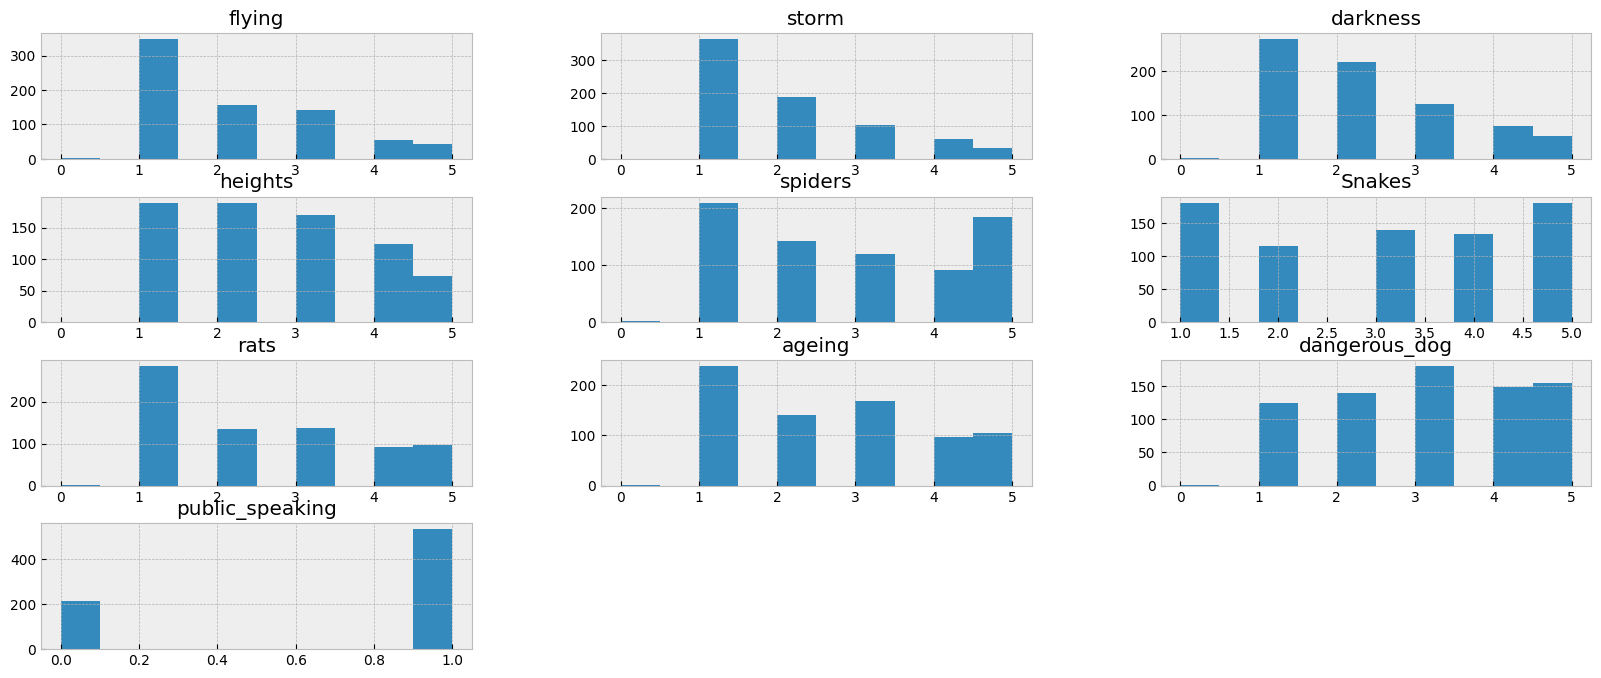

In [88]:
# Create a figure with a specified size
fig = plt.figure(figsize = (20,8))
# Create an Axes object for the plot
ax = fig.gca()
# Generate histograms for each numeric column in the DataFrame
clean_data.hist(ax=ax)
# Display the plot
plt.show()

In [94]:
#since the output variable is imbalance data, so I will apply the random undersampling to make it balance
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = clean_data[clean_data['public_speaking'] == 1]
df_minority = clean_data[clean_data['public_speaking'] == 0]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_minority),  # match minority class size
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Print class counts to verify
print(df_balanced['public_speaking'].value_counts())

# Print the balanced DataFrame
df_balanced.shape

#after checking this, the dataset is balance now.

public_speaking
1    216
0    216
Name: count, dtype: int64


(432, 10)

In [97]:
#seem like all the data is cleaned now
df_balanced.tail()

# label = 1 : afraid of public speaking
# label = 0 : not afraid of public speaking

,flying,storm,darkness,heights,spiders,Snakes,rats,ageing,dangerous_dog,public_speaking
988,1,1,1,1,1,1,1,1,1,0
989,2,5,4,5,1,1,1,2,1,0
990,1,1,1,1,1,1,1,2,1,0
997,5,3,2,1,4,5,4,2,3,0
1009,2,1,2,5,1,4,2,2,3,0


In [119]:
# Separate features and target variable
X = df_balanced.drop('public_speaking', axis=1)  # Features
y = df_balanced['public_speaking']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


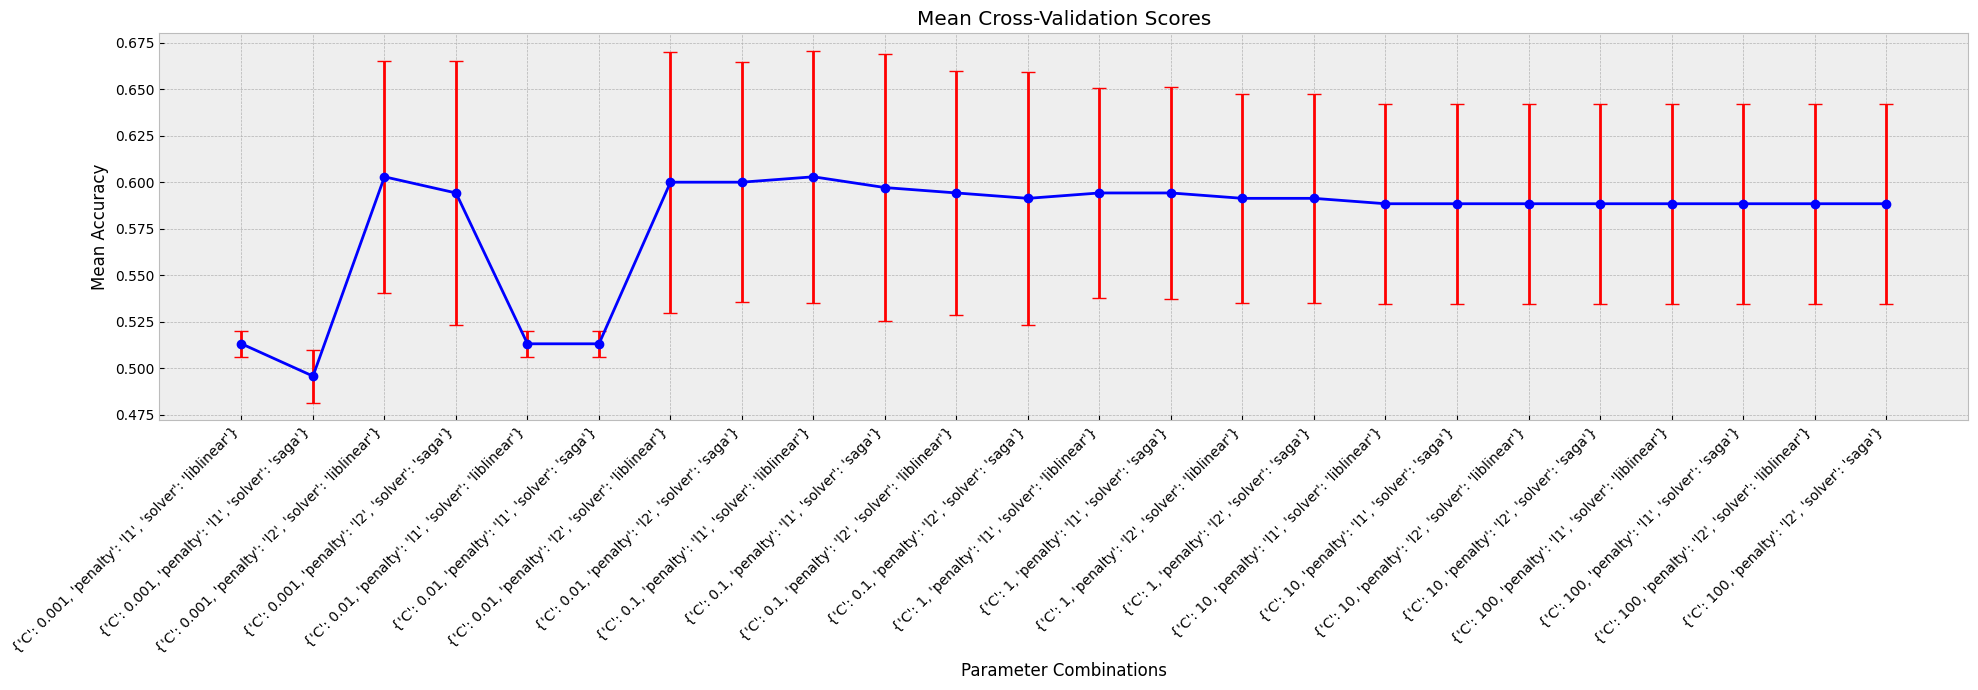

****************************************************************************************************
Best parameters found: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6028985507246376
****************************************************************************************************
Test set accuracy: 0.6091954022988506
Test set precision: 0.675
Test set recall: 0.5625
Test set F1-score: 0.6136363636363636
****************************************************************************************************


In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create a logistic regression model
logreg = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract cross-validation results
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']
params = cv_results['params']

# Plotting mean cross-validation scores
plt.figure(figsize=(20, 7))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='-o', color='b', ecolor='r', capsize=5)
plt.xticks(range(len(mean_scores)), [str(param) for param in params], rotation=45, ha='right')
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Cross-Validation Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the best parameters and best score
print("**" * 50)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
print("**" * 50)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1-score: {f1}')
print("**" * 50)

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Create a logistic regression model with best parameters
best_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
model = LogisticRegression(**best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Generate confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)


# Additional evaluation metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("**"*50)
print("\n")

print("\nTraining Set Metrics:")
print("\n")

print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("\n")
print("**"*50)
print("\n")

print("\nTesting Set Metrics:")
print("\n")

print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("\n")

print("**"*50)

****************************************************************************************************



Training Set Metrics:


Accuracy: 0.6347826086956522
Precision: 0.6296296296296297
Recall: 0.6071428571428571
F1-score: 0.6181818181818182


****************************************************************************************************



Testing Set Metrics:


Accuracy: 0.6091954022988506
Precision: 0.675
Recall: 0.5625
F1-score: 0.6136363636363636


****************************************************************************************************
